# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [36]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
import seaborn as sns

### Load the dataset

Load the cleaned dataset.

In [25]:
wnba = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\M2-mini-project2\\data\\wnba_clean.csv')
wnba.head()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College Experience  Games Played  MIN  FGM  \
0   January 17, 1994   23  Michigan State          2             8  173   30   
1       May 14, 1982   35            Duke         12            30  947   90   
2   October 27, 1990   26      Penn State          4            26  617   82   
3  December 11, 1988   28    Georgia Tech          6            31  721   75   
4     August 5, 1994   23          Baylor          R            24  137   16   

   FGA   FG%  3PM  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  \
0   85  35.3   12   32  37.5   21   26  80.8     6    22   28   12    3    6   
1  177  50.8    5   18  27.8   32   41  78.0    19    82  101   72   63   13   
2  218  37.6   19   64  29.7   35   42  83.3     4    36   40   78   22    3   
3  195  38.5   21   68  30.9   17   21  81.0    35   134  169   65   20   10   
4   50  32.0    7   20  35.0   11   12  91.7     3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0    0  
3  38  188    2    0  
4  14   50    0    0

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [ ]:
"""
We could use some hypothesis testing, assuming that the null hypothesis H0 is :
Ho = µ(WNBA) = µ(world)
Ha = µ(WNBA) != µ(world)

But we don't have any information about the players in the world. 
"""

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [27]:
#The sample mean is :
#wnba['Weight'].mean()
#ttest_1samp(wnba['Weight'], 78)

mean = np.mean(wnba['Weight'])
std = np.std(wnba['Weight'])

stats.t.interval(0.95, df =(len(wnba['Weight'])-1), loc=mean, scale=std/np.sqrt(len(wnba['Weight'])))

(77.16752645338501, 80.79022002548824)

**What can you say about these results?**

In [10]:
#We are now 95% sure that the mean weight of all the female basketball player are in an interval (77, 81)kg.

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [31]:
"""
I'd say that my grandmother is right in a way that my sister's weight is below the average weight amongst professional 
female basketball players by almost 10kg.
But, just looking at the WNBA players, 20% (so 1 out of 5) players weight less than or 68kg ! So even though she doesn't 
belong to the majority, it seems like weight is not a crippling criteria and other physical factors such as height and BMI
might matter as well.
"""

np.percentile(wnba[wnba['Weight'].isnull() == False]['Weight'], 20)

68.2

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

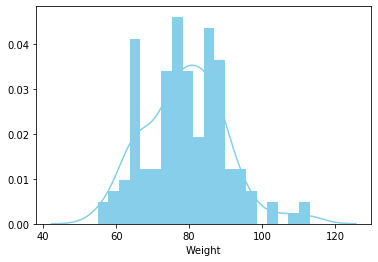

In [42]:
sns.distplot(wnba[wnba['Weight'].isnull() == False]['Weight'], bins=20, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [10]:
"""
We will have to use a t-distribution for this testing, 
as we don't know the standard deviation of the fail percentage of free throws of all the female players in the world.

We will also assume the distribution of the percentage of failure is normally distributed, even though this sample
mix experienced players with players that plays less often and with less experience.

We also might want to ignore any relationship with other variables, like position, games played...

Also, we have the percentage of success, so we'll have to assume that our sister thinks that female basketball player
success is less than 60%.
"""

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [43]:
mean = np.mean(wnba['FT%'])
std = np.std(wnba['FT%'])

stats.t.interval(0.95, df =(len(wnba['FT%'])-1), loc=mean, scale=std/np.sqrt(len(wnba['FT%'])))

(72.49585776073155, 78.66078559591176)

**What can you comment about our result? What would you tell your sister?**

In [21]:
"""
This confidence level tells us that we are 95% sure that the success rate of Free Throws is in a range of (72.5, 79)%. 
So there is only 2.5% chance that the failure rate of Free Throws is higher than 27.5% amongst female
basketball players.
"""

(74.2620136228306, 76.89462973381272)

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [49]:
#plt.boxplot(100-wnba['FT%']);
sns.distplot(100-wnba['FT%'], bins=20, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':1});
#100- because we want to see the failure rate, not the success.
#And we see here that more than 75% of the failure rate is less than 30%. Which disproves our sister's hypothesis.

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
"""
Here our population is the players in NBA + WNBA, and our sample is about the players in WNBA.
"""

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [26]:
#Ho= µ(assist WNBA) = µ(assist WNBA+NBA)
#H1 = µ(assist WNBA) != µ(assist WNBA+NBA)

ttest_1samp(wnba['AST'], 52)

"""p-value is lower than 0.05 so we can reject the null hypothesis saying that the average number of assists in WNBA 
is the same as the average assists amongst all players, NBA and WNBA"""

Ttest_1sampResult(statistic=-2.2396270335095663, pvalue=0.02666926483570908)

In [45]:
wnba['AST'].mean()

44.23076923076923

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [23]:
#Ho= µ(assist WNBA) <= µ(assist WNBA+NBA)
#H1 = µ(assist WNBA) > µ(assist WNBA+NBA)

res = ttest_1samp(wnba['AST'], 52)
res
#res[1]/2

"""
Just by looking at the p-value, we could reject the null hypothesis cause it is lower than 0.05.
But statistics is negative, which means that µ(assist WNBA) tends to be lower than µ(assist WNBA+NBA) just like said in
our null hypothesis.
In this case, we cannot reject the null hypothesis.
We cannot prove statistically that the average assist among WNBA is OR isn't greater than the average assist among all players
in NBA and WNBA."""

Ttest_1sampResult(statistic=-2.2396270335095663, pvalue=0.02666926483570908)

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [48]:
sns.distplot(wnba['AST'], bins=20, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':1});

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here